# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
#from api_keys import weather_api_key

weather_api_key = os.environ.get('weather_api_key')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


* API call:
    <p>http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID={YOUR API KEY}</p>
* Parameters:
    <p>APPID unique API key (you can always find it on the account page, on the "API key" tab)</p>
* Example of API call:
    <p>api.openweathermap.org/data/2.5/forecast?id=524901&APPID={YOUR API KEY}</p>

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#query_url

In [4]:
responses = []

i = 1
for city in cities:
    
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
        i +=1
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Processing Record 1 | jamestown
Processing Record 2 | cap malheureux
Processing Record 3 | kapaa
Processing Record 4 | bredasdorp
Processing Record 5 | cidreira
Processing Record 6 | pachino
City not found. Skipping...
Processing Record 7 | olafsvik
Processing Record 8 | ushuaia
Processing Record 9 | busselton
Processing Record 10 | port alfred
Processing Record 11 | torbay
Processing Record 12 | saint-philippe
Processing Record 13 | elko
Processing Record 14 | yamada
Processing Record 15 | mataura
Processing Record 16 | cape town
Processing Record 17 | nikolskoye
Processing Record 18 | bluff
Processing Record 19 | bethel
Processing Record 20 | taksimo
Processing Record 21 | saskylakh
Processing Record 22 | pampas
Processing Record 23 | vanavara
Processing Record 24 | ayia marina
Processing Record 25 | vaini
Processing Record 26 | touros
Processing Record 27 | aksay
Processing Record 28 | albany
Processing Record 29 | chokurdakh
Processing Record 30 | hilo
City not found. Skipping...
P

Processing Record 236 | larsnes
Processing Record 237 | cabo rojo
Processing Record 238 | kinkala
Processing Record 239 | el cope
Processing Record 240 | georgetown
City not found. Skipping...
Processing Record 241 | matamoros
Processing Record 242 | aracati
Processing Record 243 | vuktyl
Processing Record 244 | pak phanang
Processing Record 245 | skjervoy
City not found. Skipping...
Processing Record 246 | bonthe
Processing Record 247 | lazaro cardenas
Processing Record 248 | prainha
Processing Record 249 | fort nelson
Processing Record 250 | leshukonskoye
Processing Record 251 | voh
Processing Record 252 | yuzhou
Processing Record 253 | la ronge
Processing Record 254 | pacific grove
Processing Record 255 | talara
Processing Record 256 | bairiki
Processing Record 257 | jennings
Processing Record 258 | pangnirtung
Processing Record 259 | hurricane
Processing Record 260 | teguldet
Processing Record 261 | egvekinot
City not found. Skipping...
Processing Record 262 | avera
Processing Reco

Processing Record 466 | acapulco
Processing Record 467 | ixtapa
Processing Record 468 | viedma
Processing Record 469 | vao
City not found. Skipping...
Processing Record 470 | velyka pysarivka
Processing Record 471 | saint-ambroise
Processing Record 472 | taoudenni
Processing Record 473 | kalemie
Processing Record 474 | hay river
Processing Record 475 | dunedin
Processing Record 476 | surt
Processing Record 477 | harper
Processing Record 478 | rorvik
Processing Record 479 | vaitape
Processing Record 480 | oranjestad
Processing Record 481 | richards bay
Processing Record 482 | aksu
Processing Record 483 | aiquile
Processing Record 484 | piacabucu
Processing Record 485 | flin flon
Processing Record 486 | salalah
Processing Record 487 | sibolga
Processing Record 488 | kabansk
Processing Record 489 | hauknes
Processing Record 490 | faya
Processing Record 491 | hervey bay
Processing Record 492 | puerto ayacucho
City not found. Skipping...
Processing Record 493 | severodvinsk
Processing Recor

In [5]:
# set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
#count = 0

#  response = requests.get(query_url + city).json()
    
# Loop through the list of cities and perform a request for data on each

for resp in responses:
    city_name.append(resp['name'])
    cloudiness.append(resp['clouds']['all'])
    country.append(resp['sys']['country'])
    date.append(resp['dt'])
    humidity.append(resp['main']['humidity'])
    lat.append(resp['coord']['lat'])
    lng.append(resp['coord']['lon'])
    max_temp.append(resp['main']['temp_max'])
    wind_speed.append(resp['wind']['speed'])


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_dict = {"City": city_name,"Latitude": lat, "Longitude": lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
city_df = pd.DataFrame(city_dict)
city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,66.20,88,1,3.36,US,1592659411
1,Cap Malheureux,-19.98,57.61,73.00,70,41,10.00,MU,1592659707
2,Kapaa,22.08,-159.32,77.00,78,20,14.99,US,1592659707
3,Bredasdorp,-34.53,20.04,69.80,60,3,3.60,ZA,1592659707
4,Cidreira,-30.18,-50.21,68.99,89,93,6.17,BR,1592659707


In [7]:
city_df.to_csv('../output_data/city_data.csv', index=False)

In [8]:
city_df.count()

City          586
Latitude      586
Longitude     586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,5.860000e+02
mean,20.226280,15.745648,70.030717,66.919795,48.295222,8.297133,1.592660e+09
std,33.401039,90.823225,15.264858,23.250594,39.694817,5.457889,6.710075e+01
min,-54.800000,-179.170000,32.000000,3.000000,0.000000,0.070000,1.592659e+09
25%,-7.167500,-63.592500,59.000000,54.000000,2.000000,4.000000,1.592660e+09
50%,22.910000,18.825000,72.060000,73.000000,40.000000,6.930000,1.592660e+09
75%,48.090000,97.615000,80.642500,84.000000,90.000000,11.410000,1.592660e+09
max,78.220000,179.320000,114.530000,100.000000,100.000000,30.740000,1.592660e+09


In [10]:
(city_df['Humidity'] > 100).value_counts()

False    586
Name: Humidity, dtype: int64

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

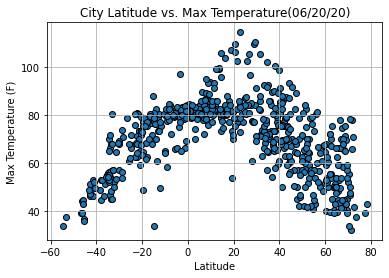

<Figure size 432x288 with 0 Axes>

In [31]:
plt_lat = city_df["Latitude"]
plt_max_temp = city_df["Max Temp"]
plt.scatter(plt_lat,plt_max_temp,edgecolors="black")
plt.title('City Latitude vs. Max Temperature(06/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
plt.savefig('../output_data/CityLatitudeVsMaxTemp.png')

In [59]:
#The overall temperatures are above 30 and they are higher close to equator.

## Latitude vs. Humidity Plot

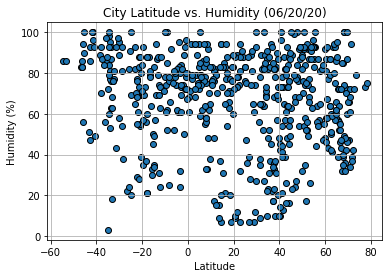

<Figure size 432x288 with 0 Axes>

In [32]:
plt_humidity = city_df["Humidity"]

plt.scatter(plt_lat,plt_humidity,edgecolors="black")
plt.title('City Latitude vs. Humidity (06/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig('../output_data/LatitudeVsHumidity.png')

In [60]:
# humidity is overall high for both hemispheres

## Latitude vs. Cloudiness Plot

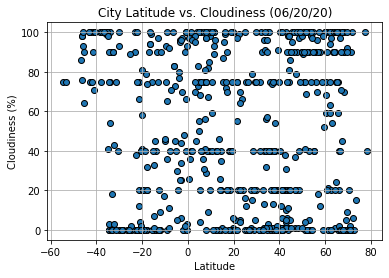

<Figure size 432x288 with 0 Axes>

In [33]:
plt_cloudiness = city_df["Cloudiness"]

plt.scatter(plt_lat,plt_cloudiness,edgecolors="black")
plt.title('City Latitude vs. Cloudiness (06/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig('../output_data/LatitudeVsCloudiness.png')

In [61]:
# Based on the chart can't say which hemisphere has more cloudiness. 

## Latitude vs. Wind Speed Plot

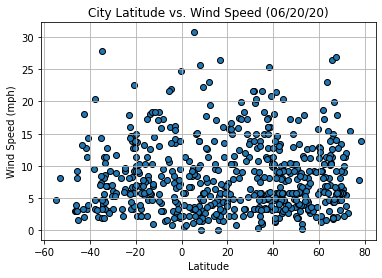

<Figure size 432x288 with 0 Axes>

In [34]:
plt_wind_speed = city_df["Wind Speed"]

plt.scatter(plt_lat,plt_wind_speed,edgecolors="black")
plt.title('City Latitude vs. Wind Speed (06/20/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
plt.savefig('../output_data/LatitudeVsWindSpeed.png')

In [62]:
# windspeed is mostly between 0 and 20 MPH with very few above 20 MPH

## Linear Regression

In [38]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_reg(df, title, y_values, y_label, text_coordinates, file_name):
    x_values = df['Latitude']
    y_values = df[y_values]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.title(title)
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    plt.savefig(file_name)

In [39]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = city_df.loc[city_df["Latitude"] >= 0,:]
southern_hem_df = city_df.loc[city_df["Latitude"] < 0,:]
northern_hem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,66.20,88,1,3.36,US,1592659411
2,Kapaa,22.08,-159.32,77.00,78,20,14.99,US,1592659707
5,Pachino,36.72,15.09,89.60,22,0,11.41,IT,1592659708
6,Olafsvik,64.89,-23.71,50.38,86,100,10.16,IS,1592659708
10,Torbay,47.67,-52.73,45.00,100,90,10.29,CA,1592659708


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.6894666769438659


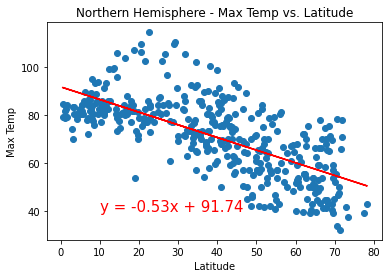

<Figure size 432x288 with 0 Axes>

In [40]:
plot_linear_reg(northern_hem_df, 'Northern Hemisphere - Max Temp vs. Latitude', 'Max Temp', 'Max Temp', (10,40), '../output_data/NorthMaxTempsVsLat.png')

In [63]:
# The high r value indicates a strong positive correlation between latitude and max temperature.
# Max Temperatures are lower as you go north from equator.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.805517450522822


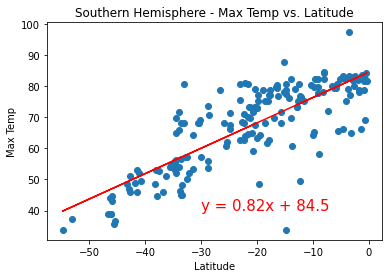

<Figure size 432x288 with 0 Axes>

In [41]:
plot_linear_reg(southern_hem_df, 'Southern Hemisphere - Max Temp vs. Latitude', 'Max Temp', 'Max Temp', (-30,40), '../output_data/SouthMaxTempsVsLat.png')

In [64]:
# The high r value indicates a strong positive correlation between latitude and max temperature.
# Basically temperatures are higher as you go close to equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.028253520198005838


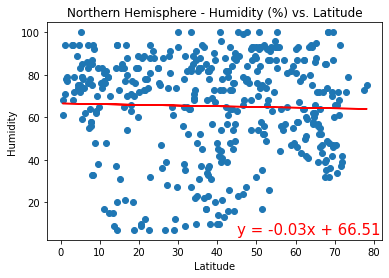

<Figure size 432x288 with 0 Axes>

In [45]:
plot_linear_reg(northern_hem_df, 'Northern Hemisphere - Humidity (%) vs. Latitude', 'Humidity', 'Humidity', (45,5), '../output_data/NorthHumidityVsLat.png')

In [65]:
# The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.15096506437517837


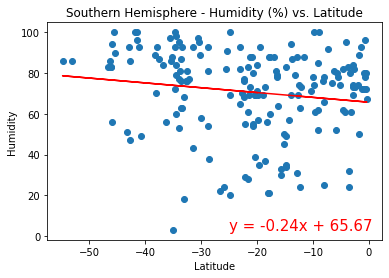

<Figure size 432x288 with 0 Axes>

In [50]:
plot_linear_reg(southern_hem_df, 'Southern Hemisphere - Humidity (%) vs. Latitude', 'Humidity', 'Humidity', (-25,3), '../output_data/SouthHumidityVsLat.png')

In [66]:
# The low r values indicate a weak to no relationship between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.011753443938600342


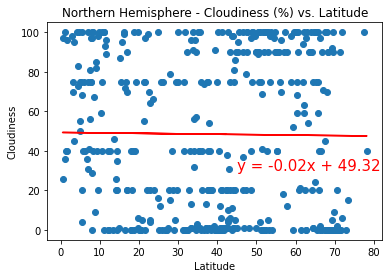

<Figure size 432x288 with 0 Axes>

In [52]:
plot_linear_reg(northern_hem_df, 'Northern Hemisphere - Cloudiness (%) vs. Latitude', 'Cloudiness', 'Cloudiness', (45,30), '../output_data/NorthCloudinessVsLat')

In [67]:
# The low r values indicate a weak to no relationship between cloudiness and latitude for northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.20748823803033095


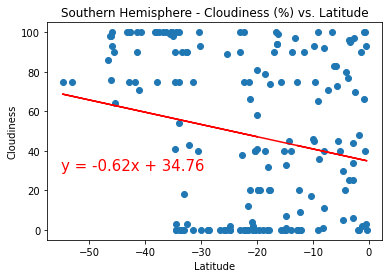

<Figure size 432x288 with 0 Axes>

In [53]:
plot_linear_reg(southern_hem_df, 'Southern Hemisphere - Cloudiness (%) vs. Latitude', 'Cloudiness', 'Cloudiness', (-55,30), '../output_data/SouthCloudinessVsLat.png')

In [68]:
# but for southern hemisphere the rvalue is some relation between cloudiness and latitue

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03616924485584213


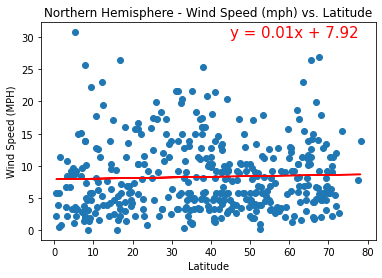

<Figure size 432x288 with 0 Axes>

In [56]:
plot_linear_reg(northern_hem_df, 'Northern Hemisphere - Wind Speed (mph) vs. Latitude', 'Wind Speed', 'Wind Speed (MPH)', (45,30), '../output_data/NorthWindSpeedVsLat.png')

In [69]:
# The low r values indicate that there is no real relationship between wind speed and latitude. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.15400325450734756


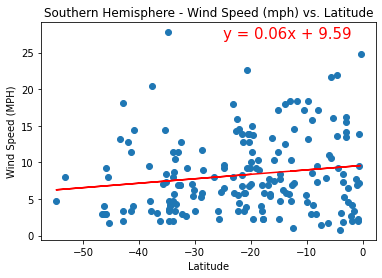

<Figure size 432x288 with 0 Axes>

In [58]:
plot_linear_reg(southern_hem_df, 'Southern Hemisphere - Wind Speed (mph) vs. Latitude', 'Wind Speed', 'Wind Speed (MPH)', (-25,27), '../output_data/SouthWindSpeedVsLat.png')

In [70]:
# The low r values indicate that there is no real relationship between wind speed and latitude. 